In [1]:
# Data used in DataCamp exercises cannot be downloaded.
# Luckily, I found it here. Credits to: https://www.geek-share.com/detail/2791753394.html

# Uncomment to get data 
#fn = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
#from urllib.request import urlretrieve
#urlretrieve(fn, 'diabetes.csv')

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score, mean_squared_error

from scipy.stats import randint

# [PIMA Indians](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset

In [3]:
pima = pd.read_csv('diabetes.csv')
pima.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# kNN Classification

In [6]:
data = pima.copy()

In [7]:
X = data.drop('diabetes', axis=1) #input
y = data['diabetes']

In [8]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [9]:
# Initiate kNN
model = KNeighborsClassifier(6)

In [10]:
# Fit to data
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [11]:
# Predict labels of test data
y_pred = model.predict(X_test)

In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



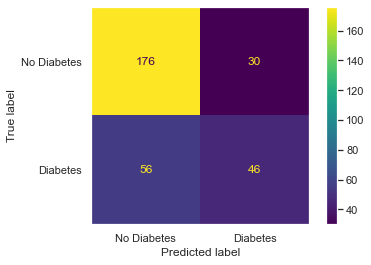

In [13]:
plot_confusion_matrix(model, X_test, y_test.values.reshape(-1, 1),
                      display_labels=['No Diabetes', 'Diabetes'])
plt.grid(False)
plt.show()

# Logistic Regression

In [14]:
# Initiate regressor
model2 = LogisticRegression()

In [15]:
# Fit to data
model2.fit(X_train, y_train)

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [16]:
y_pred = model2.predict(X_test)

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



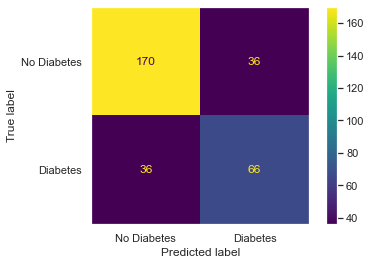

In [18]:
plot_confusion_matrix(model2, X_test, y_test.values.reshape(-1, 1),
                      display_labels=['No Diabetes', 'Diabetes'])
plt.grid(False)
plt.show()

## ROC Curve

In [19]:
# Predicted probabilities
y_pred_prob = model2.predict_proba(X_test)[:, 1]

In [20]:
# ROC Curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

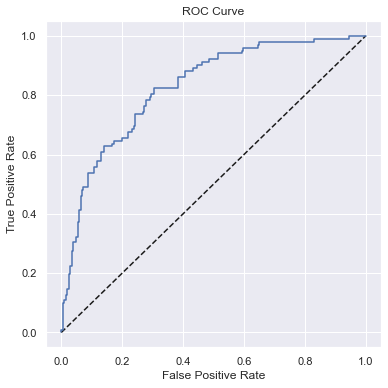

In [21]:
# Plotting ROC Curve
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

### AUC (Area under the Curve)
The greater the AUC, the better. When AUC > 50%, it's better than just guessing.

In [26]:
print(f'AUC: {roc_auc_score(y_test, y_pred_prob)}')

AUC: 0.8260517799352751


In [27]:
cv_auc = cross_val_score(model2, X, y, cv=5, scoring='roc_auc')
print(f'AUC scores computed using 5-fold CV: {cv_auc}')

AUC scores computed using 5-fold CV: [0.80814815 0.80814815 0.82666667 0.87471698 0.83245283]


C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

### Hyperparameter fine-tuning using `GridSearchCV`

In [29]:
# Setup hyperparameter grid which for logistic regression
# is the regularization parameter C

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [30]:
# Initiate logistic regressor
model3 = LogisticRegression()

In [31]:
# Initiate GridSearchCV
model3_cv = GridSearchCV(model3, param_grid, cv=5)

In [33]:
# Fit to data
model3_cv.fit(X, y)

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [34]:
print(f'Tuned Logistic Regression Parameters: {model3_cv.best_params_}')
print(f'Best score is {model3_cv.best_score_}')

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.774755962991257


# Decision Tree Classifier
(New to me)

## Hyperparameter Tuning with `RandomizedSearchCV`

In [37]:
# Setup up hyperparameter space
param_dist = {'max_depth': [3, None],
              'max_features': randint(1, 9),
              'min_samples_leaf': randint(1, 9),
              'criterion': ['gini', 'entropy']}

In [38]:
# Initiate Decision Tree
model4 = DecisionTreeClassifier()

In [40]:
# Initiate RandomizedSearchCV object
model4_cv = RandomizedSearchCV(model4, param_dist, cv=5)

In [41]:
# Fit to data
model4_cv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020B9C9A3608>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020B98B8B908>})

In [42]:
print(f'Tuned Decision Tree Parameters: {model4_cv.best_params_}')
print(f'Best score is {model4_cv.best_score_}')

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7}
Best score is 0.7409048467871997


# Back to Logistic Regression
This time, with a test set, and `GridSearchCV`

In [43]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space,
              'penalty': ['l1', 'l2']} #L1 and L2 regularization

In [44]:
# Initiate the logistic regressor
model5 = LogisticRegression()

In [45]:
# Create the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [46]:
# Initiate the GridSearchCV object
model5_cv = GridSearchCV(model5, param_grid, cv=5)

In [47]:
# Fit to data
model5_cv.fit(X_train, y_train)

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\model_selection\_validation.py:55

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: Co

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']})

In [48]:
print(f'Tuned Logistic Regression Parameters: {model5_cv.best_params_}')
print(f'Tuned Logistic Regression Accuracy: {model5_cv.best_score_}')

Tuned Logistic Regression Parameters: {'C': 2275.845926074791, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7760869565217391


# Back to Gapminder
But this time, using `ElasticNet` and `GridSearchCV`

In [50]:
gap = pd.read_csv('Gapminder.csv')
gap.head(3)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4


In [51]:
data2 = gap.copy()

In [53]:
X = data2.drop('life', axis=1) #input
y = data2['life']

In [54]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [55]:
# Create hyperparameter grid: 'l1_ratio' for ElasticNet
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

In [56]:
# Initiate ElasticNet regressor
model6 = ElasticNet()

In [57]:
# Initiate GridSearchCV object
model6_cv = GridSearchCV(model6, param_grid, cv=5)

In [58]:
# Fit to data
model6_cv.fit(X_train, y_train)

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.4862175850658, tolerance: 0.558941590909091
  positive)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.846639148628, tolerance: 0.5893071666666667
  positive)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.50344008061404, tolerance: 0.5890250303030303
  positive)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])})

In [61]:
# Predict on test set and compute metrics
y_pred = model6_cv.predict(X_test)
r2 = model6_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

In [63]:
print(f'Tuned ElasticNet l1 ratio: {model6_cv.best_params_}')
print(f'Tuned ElasticNet R squared: {r2}')
print(f'Tuned ElasticNet MSE: {mse}')

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.057914133398441
